## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()

Saving GSS.xlsx to GSS.xlsx


In [5]:
file_path = r"GSS.xlsx"
df = pd.read_excel(file_path)

The data I chose from the GSS measures music taste across different genres, as well as respondants' experience with attending music events and playing musical instruments. I love listening to all kinds of music and know how to play some instruments, so I'm curious if there are certain preferences that are more likely to come in batches, or if people who play music tend to like certain types of music. The data is from 1993 (that was the only year these questions were asked). Sentiment towards a genre is measured on a scale from "dislike very much" to "like very much".

Variables:

year: survey year

gomusic: if the respondant has attended a classical music or opera event (non-school) in the past year

plymusic: if the respondant has played a musical instrument in the past year

country: respondant's feelings towards country music

blues: respondant's feelings towards blues/R&B music

classicl: respondant's feelings towards classical music

folk: respondant's feelings towards folk music

gospel: respondant's feelings towards gospel music

jazz: respondant's feelings towards gospel music

rap: respondant's feelings towards rap music

oldies: respondant's feelings towards older/classic rock music

hvymetal: respondant's feelings towards heavy metal music

In [6]:
#First I will drop ballot because it is useless
df.drop(columns='ballot', inplace=True)

In [7]:
#Next I will replace the preference values with ordinal values 1-5, from dislike very much to like very much
#Do not know/cannot choose, no answer, and inapplicable will be replaced with null values
df.replace({'DISLIKE VERY MUCH': 1, 'DISLIKE IT': 2, 'MIXED FEELINGS': 3, 'LIKE IT': 4, 'LIKE VERY MUCH': 5, '.d:  Do not Know/Cannot Choose':None, '.n:  No answer' : None, '.i:  Inapplicable': None
       }, inplace=True)

/tmp/ipython-input-2167673204.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'DISLIKE VERY MUCH': 1, 'DISLIKE IT': 2, 'MIXED FEELINGS': 3, 'LIKE IT': 4, 'LIKE VERY MUCH': 5, '.d:  Do not Know/Cannot Choose':None, '.n:  No answer' : None, '.i:  Inapplicable': None


In [8]:
df.head()

,year,id_,country,blues,classicl,folk,gospel,jazz,rap,oldies,hvymetal,gomusic,plymusic
0,1993,1,3.0,4.0,5.0,3.0,2.0,4.0,1.0,2.0,1.0,NO,NO
1,1993,2,3.0,5.0,5.0,4.0,5.0,5.0,2.0,5.0,1.0,NO,NO
2,1993,3,3.0,3.0,5.0,4.0,3.0,3.0,2.0,5.0,2.0,YES,NO
3,1993,4,3.0,3.0,5.0,1.0,1.0,4.0,1.0,4.0,1.0,NO,NO
4,1993,5,2.0,5.0,5.0,5.0,3.0,5.0,NaN,1.0,NaN,YES,NO


          country     blues  classicl      folk    gospel      jazz       rap  \
gomusic                                                                         
NO       3.728929  3.480499  3.144882  3.182395  3.631902  3.332562  2.074766   
YES      3.408730  3.613546  4.279528  3.544000  3.472000  3.718254  2.085714   

           oldies  hvymetal  
gomusic                      
NO       3.734819  1.895440  
YES      3.855422  1.783133  


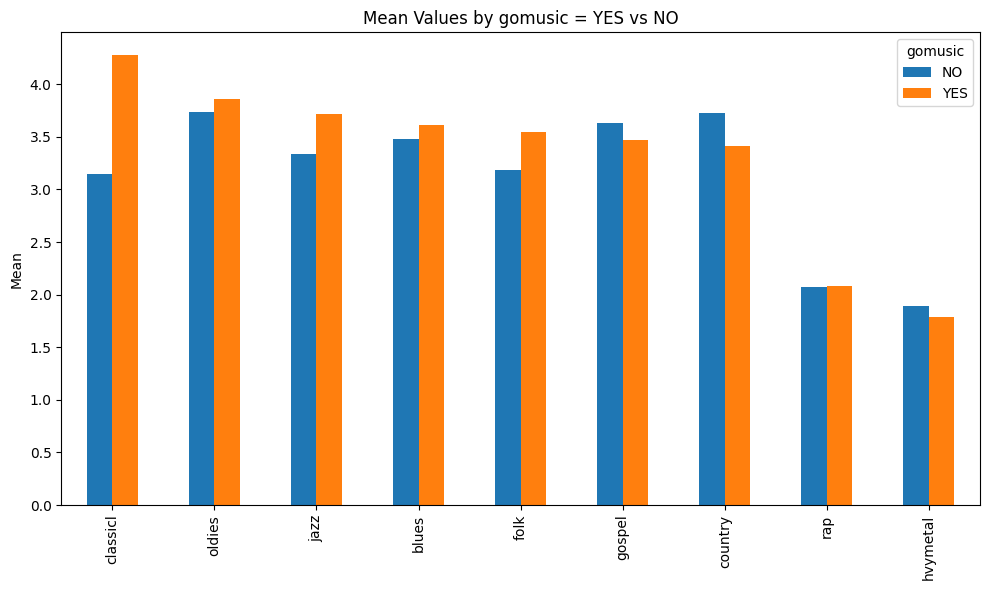

           country     blues  classicl      folk   gospel      jazz       rap  \
plymusic                                                                        
NO        3.717970  3.462329  3.196367  3.182211  3.58888  3.349745  2.072351   
YES       3.547945  3.633609  3.762943  3.440341  3.65847  3.539295  2.084699   

            oldies  hvymetal  
plymusic                      
NO        3.715495  1.862576  
YES       3.882834  1.922652  


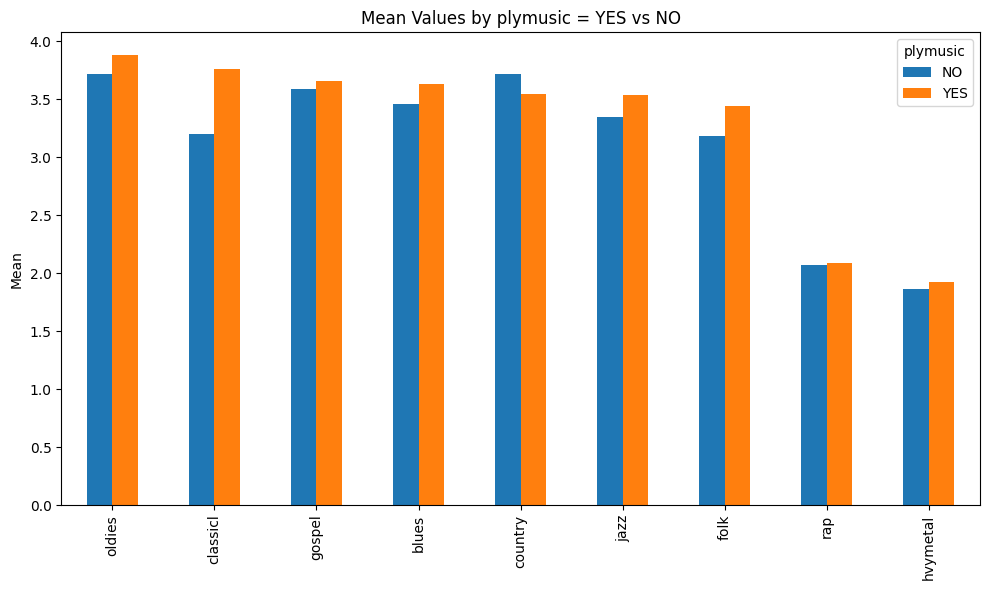

In [20]:
df_vars = df.drop(columns=['year', 'id_'])
group_means = df_vars.groupby('gomusic').mean(numeric_only=True)
print(group_means)
means_t = group_means.T
means_sorted = means_t.sort_values('YES', ascending=False)
means_sorted.plot(kind='bar', figsize=(10, 6))
plt.title("Mean Values by gomusic = YES vs NO")
plt.ylabel("Mean")
plt.tight_layout()
plt.show()

group_means_2 = df_vars.groupby('plymusic').mean(numeric_only=True)
print(group_means_2)
means_t_2 = group_means_2.T
means_sorted_2 = means_t_2.sort_values('YES', ascending=False)
means_sorted_2.plot(kind='bar', figsize=(10, 6))
plt.title("Mean Values by plymusic = YES vs NO")
plt.ylabel("Mean")
plt.tight_layout()
plt.show()

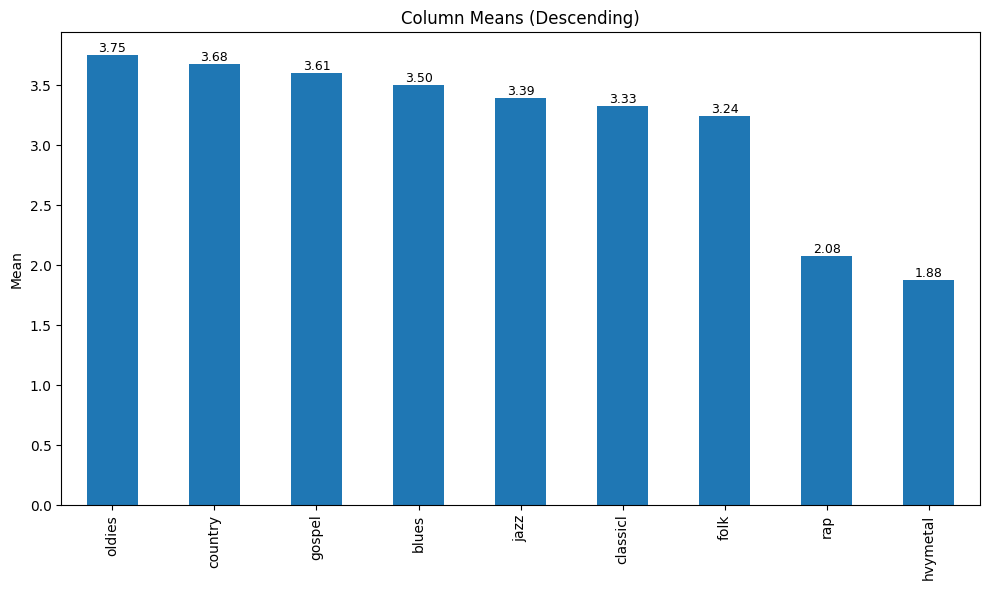

In [26]:
col_means = df_vars.mean(numeric_only=True)
col_means_sorted = col_means.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))
col_means_sorted.plot(kind='bar', ax=ax)

for i, v in enumerate(col_means_sorted):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=9)

plt.title("Column Means (Descending)")
plt.ylabel("Mean")
plt.tight_layout()
plt.show()


array([[<Axes: title={'center': 'country'}>,
        <Axes: title={'center': 'blues'}>,
        <Axes: title={'center': 'classicl'}>],
       [<Axes: title={'center': 'folk'}>,
        <Axes: title={'center': 'gospel'}>,
        <Axes: title={'center': 'jazz'}>],
       [<Axes: title={'center': 'rap'}>,
        <Axes: title={'center': 'oldies'}>,
        <Axes: title={'center': 'hvymetal'}>]], dtype=object)

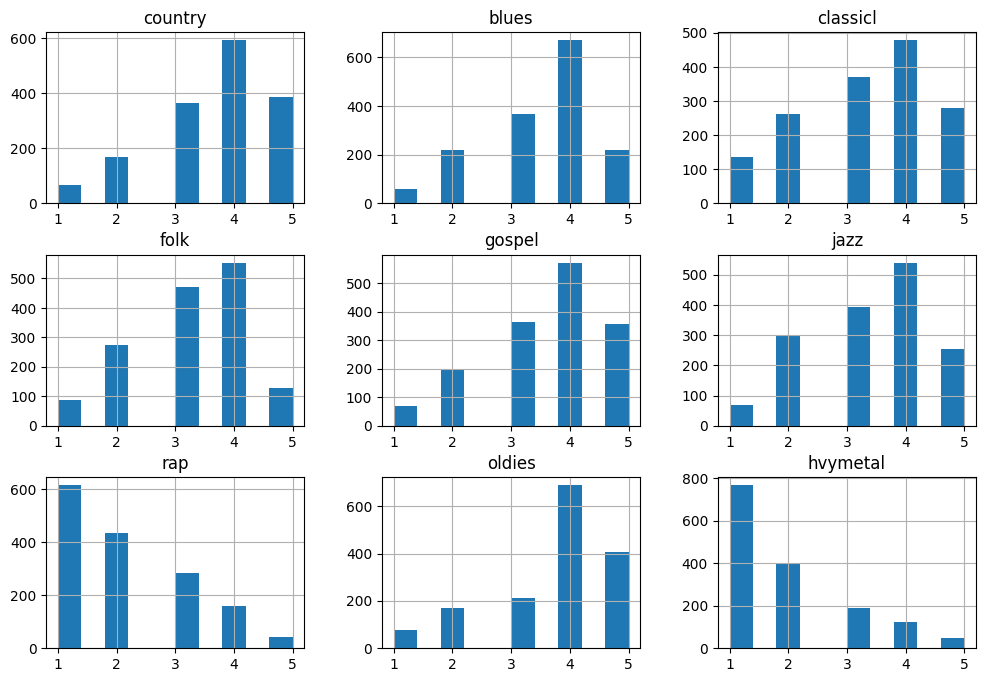

In [27]:
df_vars.hist(figsize=(12,8))

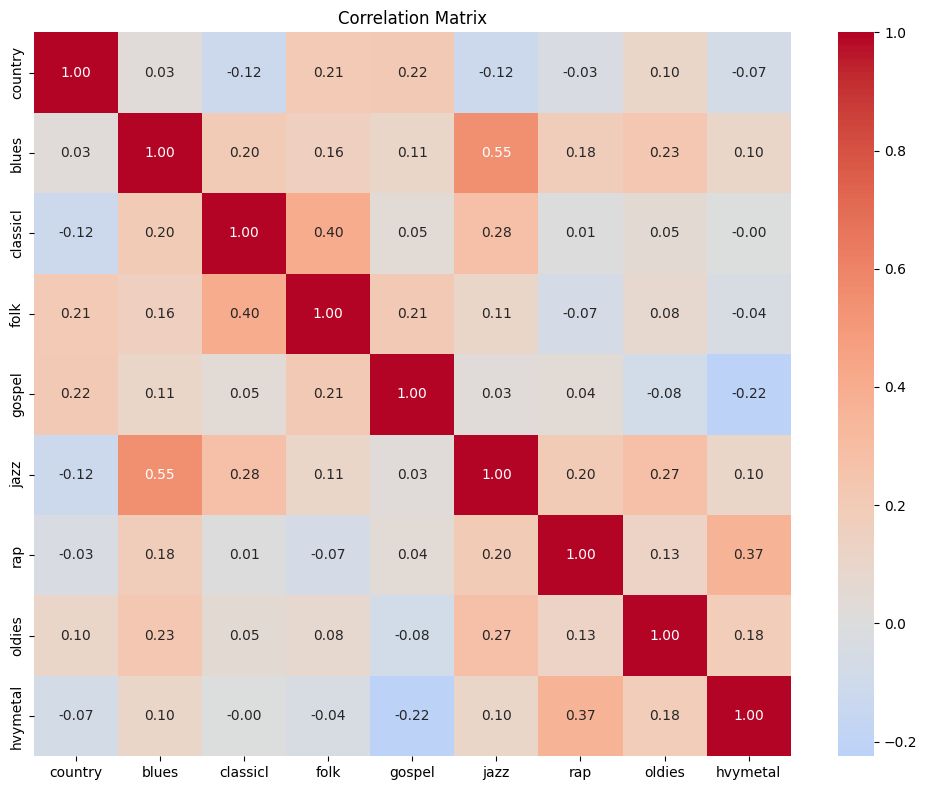

In [31]:
df_corr = df.drop(columns=['id_','year'], errors='ignore').select_dtypes(include='number')
corr = df_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            annot=True,        # show correlation values
            fmt=".2f",         # round to 2 decimals
            cmap="coolwarm",   # diverging palette
            center=0)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

From the bar chart comparing how people who have gone to see classical music or opera in the past year prefer certain genres, it's obvious and not a surprise to see that the ones who responded yes have a larger average preference for classical music. It also makes sense that they would like other more technical genres like jazz and blues. It might also make sense that they like oldies and folk because concertgoers likely tend to be older and prefer easier listening (I would've thought they'd enjoy gospel more for this reason, but I guess not). It also makes sense that they have more of a dislike for country and heavy metal, but I'm surprised to see that there's no significant difference in taste for rap music.

For the next bar chart that compares preferences for musical instrument players, it makes sense that across the board they would have a greater liking for each genre (except for country, which is perhaps because it is most consumed bu blue collar workers who might not have the time/money to play music). Classical having the largest difference between yes/no once again makes the most sense because it's likely harder for untrained musicians to enjoy classical music. One change I find interesting is that, as opposed to concertgoers, players tend to enjoy heavy metal a bit more.

For the chart comparing means sentiment by genre, I find it interesting that oldies is the most favored, I guess it's just a very inoffensive and generally liked genre. Country surprised me as well, because (these days at least) it is a very divisive genre, although maybe not in 1993. I also think it's unsurprising that rap and heavy metal are the least liked genres in 1993 (they are the only ones with an average negative sentiment (below 3)). These genres would likely be looked upon more favorably today, but back when they were relatively new I guess they weren't nearly as popular.

For the charts showing the distribution of ratings for each genre, it seems like most genres (except rap and heavy metal) all seem to have a similar distribution with peaks at 4 ("Like it") and a left-skew. For rap and heavy metal, it's the complete opposite, with the peaks at 1 ("Dislike very much") then a right skew. It seems like these genres had a lot of people who hated them in 1993, as opposed to generally positive sentiments for everything else.

For the correlation plot (measuring the tendency of certain tastes to coincide with others), it definitely makes sense that blues/rnb and jazz are the most correlated (.55), as the genres are very similar in sound and history. I can also see why classical and folk listening is correlated (.40), as both are often easier listening, but I would've thought both would also have some sort of correlation with oldies, which they don't. Rap and heavy metal being somewhat correlated (.37) also makes sense as both are countercultural in some sense (although I would've imagined different groups of people to like each, with not much crossover). The strongest negative correlation is between gospel and heavy metal, which makes perfect sense (you wouldn't expect your average church goer to be too fond of Metallica back in the day, and I would honestly expect the correlation to be a lot more negative than -.22)